# PGI deficiency case study


## Import Packages & Set Globals

In [1]:
# Import stuff

from mass import (MassModel, MassMetabolite, MassReaction, Simulation, MassSolution, strip_time)
from mass.test import create_test_model
from mass.util.matrix import nullspace, left_nullspace, matrix_rank
from mass.visualization import (plot_time_profile, plot_phase_portrait, plot_tiled_phase_portraits)
from mass.io import json, sbml
from mass.enzyme_modules import EnzymeModule

from os import path

from cobra import DictList
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format
S_FONT = {"size": "small"}
L_FONT = {"size": "large"}
INF = float("inf")
import sympy as sym

# Set some options - feel free to mess around with this to further beautify your displays

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format
S_FONT = {"size": "small"}
L_FONT = {"size": "large"}
INF = float("inf")

## Import  Models for Analysis
To assist in the export/import process, some code and instructions have been provided for you. **Please keep in mind that the code assumes that the model objects will be exported/imported from the same directory where this notebook exits.** 

The base and integrated model objects will be stored as variables ``BASELINE_MODEL`` AND ``INTEGRATED_MODEL``. respectively

### Set Model IDs
* Set the variable ``MY_BASELINE_MODEL_ID`` to a string of the baseline model's identifier in order to import the model to the current directory.
* Set the variable ``MY_INTEGRATED_MODEL_ID`` to a string of the integrated model's identifier in order to import the model to the current directory.

In [2]:
# example: MY_BASELINE_MODEL_ID = "RBC_PFK_G6PDH2r"

MY_BASELINE_MODEL_ID = "RBC"
MY_INTEGRATED_MODEL_ID = "RBC_PGI_PGK_GND"
#can add more model IDs for more models

### Import Models

In [3]:
from mass.io import json
from os.path import join
#add extra model IDS below
models = []
for model_id, model_type in zip([MY_BASELINE_MODEL_ID, MY_INTEGRATED_MODEL_ID], ["RBC", "INTEGRATED"]):
    filepath = "../models/{0}_{1}.json".format(model_id, model_type)
    models.append(json.load_json_model(filepath))
    print("Loaded {0} Model with ID: {1}".format(model_type, model_id))
core_rbc, RBC_PGI_PGK_GND = models

#set variable to a string of the model's identifier
MODULE_1_ID = 'HEX1'
MODULE_2_ID ='G6PDH2r'

models = []
for model_id, model_type in zip([MODULE_1_ID, MODULE_2_ID], ["HEX1", "G6PDH2r"]):
    filepath = "../models/{0}_{1}.json".format(model_id, model_type)
    models.append(json.load_json_model(filepath))
    print("Loaded {0} Model with ID: {1}".format(model_type, model_id))
HEX1, G6PDH2r = models

RBC_PGI_PGK_GND_G6PDH2r = G6PDH2r.merge(RBC_PGI_PGK_GND, inplace=False)
RBC_PGI_PGK_GND_G6PDH2r.remove_reactions([RBC_PGI_PGK_GND_G6PDH2r.reactions.G6PDH2r])

RBC_PGI_PGK_GND_G6PDH2r_HEX1=RBC_PGI_PGK_GND_G6PDH2r.merge(HEX1, inplace=False)
RBC_PGI_PGK_GND_G6PDH2r_HEX1.remove_reactions([RBC_PGI_PGK_GND_G6PDH2r_HEX1.reactions.HEX1])

Loaded RBC Model with ID: RBC
Loaded INTEGRATED Model with ID: RBC_PGI_PGK_GND
Loaded HEX1 Model with ID: HEX1
Loaded G6PDH2r Model with ID: G6PDH2r


Ignoring group 'Active' since it already exists.
Ignoring group 'Inhibited' since it already exists.
Ignoring group 'catalyzation' since it already exists.
Ignoring group 'product_inhibition' since it already exists.


/opt/conda/lib/python3.7/site-packages/roadrunner/roadrunner.py:3944 UserWarning: Simulation requested end point (100000000.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 100000000.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 
/opt/conda/lib/python3.7/site-packages/roadrunner/roadrunner.py:3957 UserWarning: Simulation returned more points than max output rows specified. Try incresing the number of maximum output rows or minimum step size.


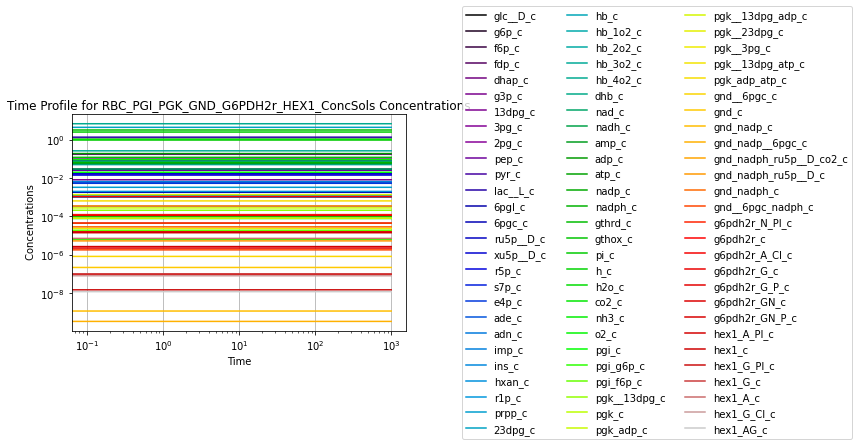

In [4]:
t0, tf = (0, 1e3)
sim_core_rbc_model = Simulation(RBC_PGI_PGK_GND_G6PDH2r_HEX1)
sim_core_rbc_model.find_steady_state(RBC_PGI_PGK_GND_G6PDH2r_HEX1, strategy="simulate",
    update_values=True)
conc_sol_ss, flux_sol_ss = sim_core_rbc_model.simulate(
    RBC_PGI_PGK_GND_G6PDH2r_HEX1, time=(t0, tf, tf*10 + 1))

# Quickly render and display time profiles
conc_sol_ss.view_time_profile()

# Simulation Case Study

## Figure 1

Successfully loaded MassModel 'RBC_PGI_PGK_GND_G6PDH2r_HEX1' into RoadRunner.


/opt/conda/lib/python3.7/site-packages/roadrunner/roadrunner.py:3944 UserWarning: Simulation requested end point (10000.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 10000.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 
mass/visualization/visualization_util.py:1188 UserWarning: Invalid `legend_loc` input: therefore utilizing default legend `loc` instead.
mass/visualization/visualization_util.py:806 UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
mass/visualization/visualization_util.py:1188 UserWarning: Invalid `legend_loc` input: therefore utilizing default legend `loc` instead.
mass/visualization/visualization_util.py:806 UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
mass/visualization/visualization_util.py:1188 UserWarning: Invalid `lege

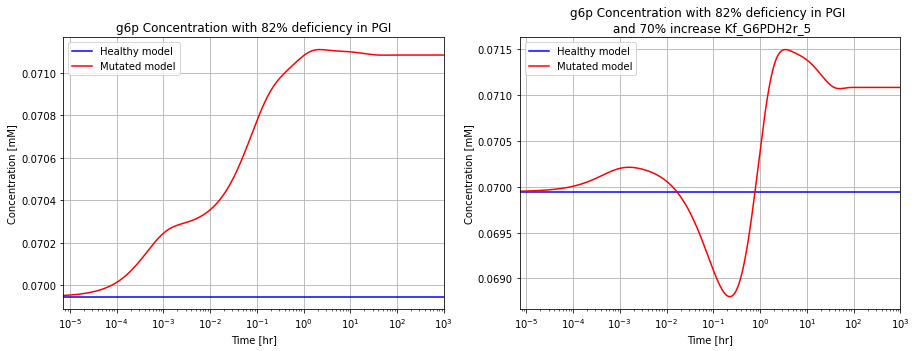

In [5]:
model_id = RBC_PGI_PGK_GND_G6PDH2r_HEX1
# Define perturbations
perturbations = {"kf_PGI_1": "kf_PGI_1 * 0.18","kf_PGI_2": "kf_PGI_2 * 0.18","kf_PGI_3": "kf_PGI_3 * 0.18"}
# Define colors and legend labels
colors = ["red"]
labels = ["82% decrease"]
# Create figure and flatten axes into a list
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
(ax1, ax2) = axes.flatten()
model = model_id
sim = Simulation(model, verbose=True)
    
# Ensure models are in steady state and make aggregate solutions
conc_sol, flux_sol = sim.find_steady_state(
model, strategy="simulate", update_values=True, tfinal=1e4)

# Initialize legend arguments
legend = None
time_points_legend = None
# Iterate through ATP perturbations

# Simulate model with perturbation and make aggregate solutions

    # Set legends on the middle plot only
time_points_legend = "lower outside"
        # Make phase portrait
conc_sol, flux_sol = sim.simulate(
    model, time=(0, 1000))
plot_time_profile(
        conc_sol, ax=ax1,observable=["g6p_c"], legend=["Healthy model", "lower"],
        plot_function="semilogx", title="g6p Concentration with 82% deficiency in PGI",
        xlim=[-1,1000],
        xlabel="Time [hr]", ylabel="Concentration [mM]",
        linestyle="-", color="blue",
        grid=("major", "both"))
    

plot_time_profile(
        conc_sol, ax=ax2, observable=["g6p_c"], legend=["Healthy model", "lower"],
        plot_function="semilogx", title="g6p Concentration with 82% deficiency in PGI \n and 70% increase Kf_G6PDH2r_5",
        xlim=[-1,1000],
        xlabel="Time [hr]", ylabel="Concentration [mM]",
        linestyle="-", color="blue",
        grid=("major", "both"))
conc_sol, flux_sol = sim.simulate(model, time=(0, 1000), perturbations=perturbations)
plot_time_profile(
        conc_sol, ax=ax1,observable=["g6p_c"], legend=["Mutated model", "lower"],
        plot_function="semilogx", title="g6p Concentration with 82% deficiency in PGI",
        xlim=[-1,1000],
        xlabel="Time [hr]", ylabel="Concentration [mM]",
        linestyle="-", color="red",
        grid=("major", "both"))
    
perturbations = {"kf_PGI_1": "kf_PGI_1 * 0.18","kf_PGI_2": "kf_PGI_2 * 0.18","kf_PGI_3": "kf_PGI_3 * 0.18",
                 "kf_G6PDH2r_5": "kf_G6PDH2r_5 * 1.7"}
conc_sol, flux_sol = sim.simulate(
model, time=(0, 1000), perturbations=perturbations)
plot_time_profile(
        conc_sol, ax=ax2, observable=["g6p_c"], legend=["Mutated model", "lower"],
        plot_function="semilogx", title="g6p Concentration with 82% deficiency in PGI \n and 70% increase Kf_G6PDH2r_5",
        xlim=[-1,1000],
        xlabel="Time [hr]", ylabel="Concentration [mM]",
        linestyle="-", color="red",
        grid=("major", "both"))

plt.savefig("./figures/PGI_Figure1"+".pdf")

## Figure 2

Successfully loaded MassModel 'RBC_PGI_PGK_GND_G6PDH2r_HEX1' into RoadRunner.


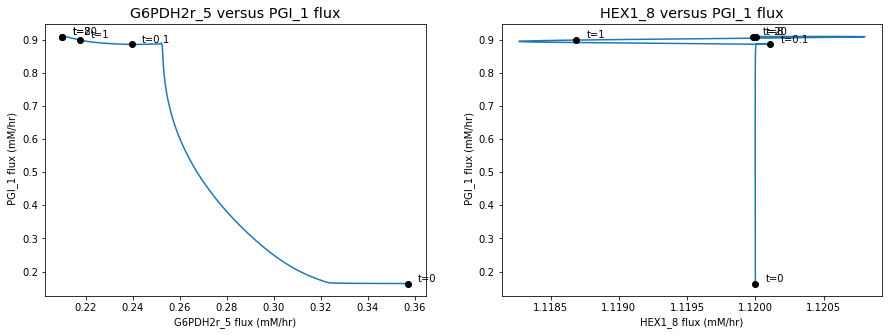

In [6]:
model_id = RBC_PGI_PGK_GND_G6PDH2r_HEX1

model=model_id
sim = Simulation(model, verbose=True)
perturbations = {"kf_PGI_1": "kf_PGI_1 * 0.18","kf_PGI_2": "kf_PGI_2 * 0.18","kf_PGI_3": "kf_PGI_3 * 0.18",
                 "kf_G6PDH2r_5": "kf_G6PDH2r_5 * 1.7"}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
(ax1, ax2) = axes.flatten()
# Initialize legend arguments
legend = None
time_points_legend = "lower outside"
# Iterate through ATP perturbations
time_points = [0, 0.1, 1,8, 20]


conc_sol, flux_sol = sim.simulate(model, time=(0, 1000), perturbations=perturbations)

plot_phase_portrait(
            flux_sol, ax=ax1, x="G6PDH2r_5", y="PGI_1",
            xlabel="G6PDH2r_5 flux (mM/hr)",         # Axes labels
            ylabel=" PGI_1 flux (mM/hr)",
            title=("G6PDH2r_5 versus PGI_1 flux", {"size": "x-large"}), # Title
            linestyle="-",
            annotate_time_points=time_points,
            annotate_time_points_labels=True,      # Annotate time points
            annotate_time_points_color="black")

plot_phase_portrait(
            flux_sol, ax=ax2, x="HEX1_8", y="PGI_1",
            xlabel="HEX1_8 flux (mM/hr)",         # Axes labels
            ylabel=" PGI_1 flux (mM/hr)",
            title=("HEX1_8 versus PGI_1 flux", {"size": "x-large"}), # Title
            linestyle="-",
            annotate_time_points=time_points,
            annotate_time_points_labels=True,      # Annotate time points
            annotate_time_points_color="black")
plt.savefig("./figures/PGI_Figure2"+".pdf")

## Figure 3

Successfully loaded MassModel 'RBC_PGI_PGK_GND_G6PDH2r_HEX1' into RoadRunner.


/opt/conda/lib/python3.7/site-packages/roadrunner/roadrunner.py:3944 UserWarning: Simulation requested end point (10000.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 10000.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 


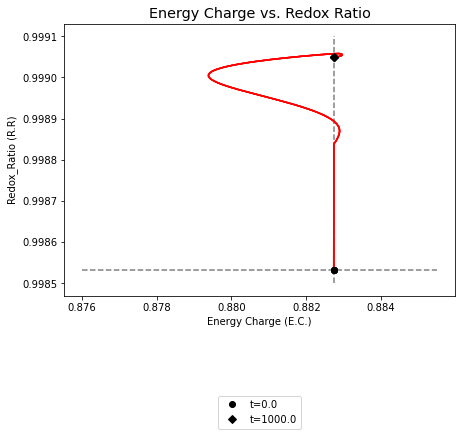

In [7]:
model_id = RBC_PGI_PGK_GND_G6PDH2r_HEX1
# Define helper functions to make aggregate solutions
def make_energy_charge_solution(conc_sol):
    conc_sol.make_aggregate_solution(
        aggregate_id="energy_charge",
        equation="(atp_c + 0.5 * adp_c) / (atp_c + adp_c + amp_c)",
        variables=["atp_c", "adp_c", "amp_c"], update=True)

def make_redox_ratio_solution(conc_sol):
    conc_sol.make_aggregate_solution(
        aggregate_id="redox_ratio",
        equation="(nadph_c) / (nadph_c + nadp_c)",
        variables=["nadph_c", "nadp_c"], update=True)
    
# Define perturbations
perturbations = {"kf_PGI_1": "kf_PGI_1 * 0.18","kf_PGI_2": "kf_PGI_2 * 0.18","kf_PGI_3": "kf_PGI_3 * 0.18",
                 "kf_G6PDH2r_5": "kf_G6PDH2r_5 * 1.7"}
colors = ["red"]

# Create figure and flatten axes into a list
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

model = model_id
sim = Simulation(model, verbose=True)

    # Ensure models are in steady state and make aggregate solutions
conc_sol, flux_sol = sim.find_steady_state(
        model, strategy="simulate", update_values=True, tfinal=1e4)
make_energy_charge_solution(conc_sol)
make_redox_ratio_solution(conc_sol)

    # Plot steady state lines
axes.plot([conc_sol["energy_charge"]] * 2, [0.9985, 0.9991],
            color="grey", linestyle="--")
axes.plot([0.876, 0.8855], [conc_sol["redox_ratio"]] * 2,
            color="grey", linestyle="--")

time_points_legend = "lower outside"
    # Iterate through ATP perturbations
for j, perturbation in enumerate(perturbations):
        # Simulate model with perturbation and make aggregate solutions
        conc_sol, flux_sol = sim.simulate(
            model, time=(0, 1000), perturbations=perturbations)
        make_energy_charge_solution(conc_sol)
        make_redox_ratio_solution(conc_sol)
        # Make phase portrait
        plot_phase_portrait(
            conc_sol, x="energy_charge", y="redox_ratio",
            ax=axes, legend=legend,                  # Set axes and legend
            xlabel="Energy Charge (E.C.)",         # Axes labels
            ylabel="Redox_Ratio (R.R)",
            title=("Energy Charge vs. Redox Ratio", {"size": "x-large"}), # Title
            linestyle="-", color=colors,       # Line color and style
            annotate_time_points="endpoints",      # Annotate time points
            annotate_time_points_color="black",
            annotate_time_points_legend=time_points_legend)
plt.savefig("./figures/PGI_Figure3"+".pdf")